# Importación de librerías y definición de funciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_univariate_time_series(signals):
    for signal_name, values in signals.items():
        data = pd.Series(values)

        # Calculamos estadísticas descriptivas
        stats = data.describe()
        stats_table = pd.DataFrame(stats).transpose()
        print(f"Estadísticas Descriptivas para {signal_name}:\n{stats_table.transpose()}\n")

        # Generamos histograma en una figura separada
        plt.figure(figsize=(6, 4))
        sns.histplot(data, kde=True, color='skyblue')
        plt.title(f'Histograma de {signal_name}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.show()

        # Generamos boxplot en una figura separada
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=data, color='lightgreen')
        plt.title(f'Boxplot de {signal_name}')
        plt.xlabel('Valor')
        plt.show()

def analyze_multivariate_time_series(signals):
    data = pd.DataFrame(signals)

    # Calculamos la matriz de correlación
    correlation_matrix = data.corr()
    print("Matriz de Correlación:\n", correlation_matrix)

    # Visualización de la matriz de correlación usando un esquema de un solo color
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

def extraer_nombres_archivos_dat(directorio):
    # Lista para almacenar los nombres de los archivos
    nombres_archivos_dat = []

    # Recorrer el directorio
    for raiz, dirs, archivos in os.walk(directorio):
        for archivo in archivos:
            # Verificar si el archivo termina con '.dat'
            if archivo.endswith('.dat'):
                nombres_archivos_dat.append(archivo[:-4])
    return nombres_archivos_dat

# Data loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pickle

os.chdir("/content/drive/MyDrive/Reconocimiento de Patrones")

with open('preprocessed_data.pickle', 'rb') as file:
    filt_dict = pickle.load(file)
    segm_dict = pickle.load(file)
    norm_segm_dict = pickle.load(file)

Mounted at /content/drive


# Análisis Exploratorio

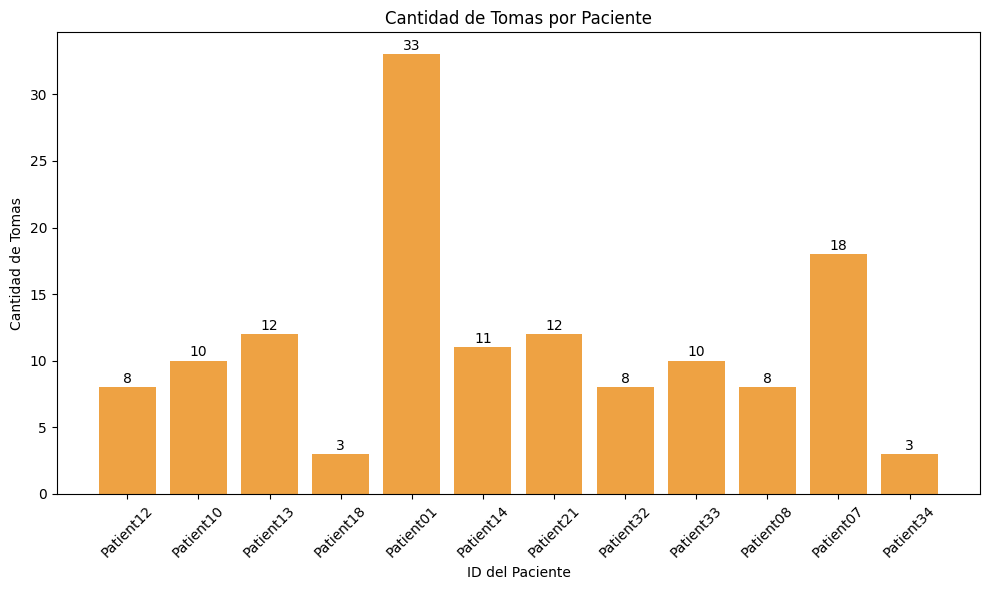

In [3]:
test_count = {}
study_count = {}
study_count_uniq = {}

file_path = './dataset/waves/'
names = extraer_nombres_archivos_dat(file_path)

for record_name in names:
    patient_id = record_name.split("_")[0]
    patient_study = record_name.split("_")[0] + "_" +record_name.split("_")[1]
    if patient_id in test_count:
        test_count[patient_id] += 1
    else:
        test_count[patient_id] = 1

    if patient_study in study_count:
      study_count[patient_study] += 1
    else:
      study_count[patient_study] = 1
for id in study_count.keys():
    patient_id_study = id.split("_")[0]
    if patient_id_study in study_count_uniq:
      study_count_uniq[patient_id_study] += 1
    else:
      study_count_uniq[patient_id_study] = 1

plt.figure(figsize=(10, 6))
plt.bar(test_count.keys(), test_count.values(), color='#EEA243')
plt.xlabel('ID del Paciente')
plt.ylabel('Cantidad de Tomas')
plt.title('Cantidad de Tomas por Paciente')
plt.xticks(rotation=45)

for patient_id, count in test_count.items():
    plt.text(patient_id, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

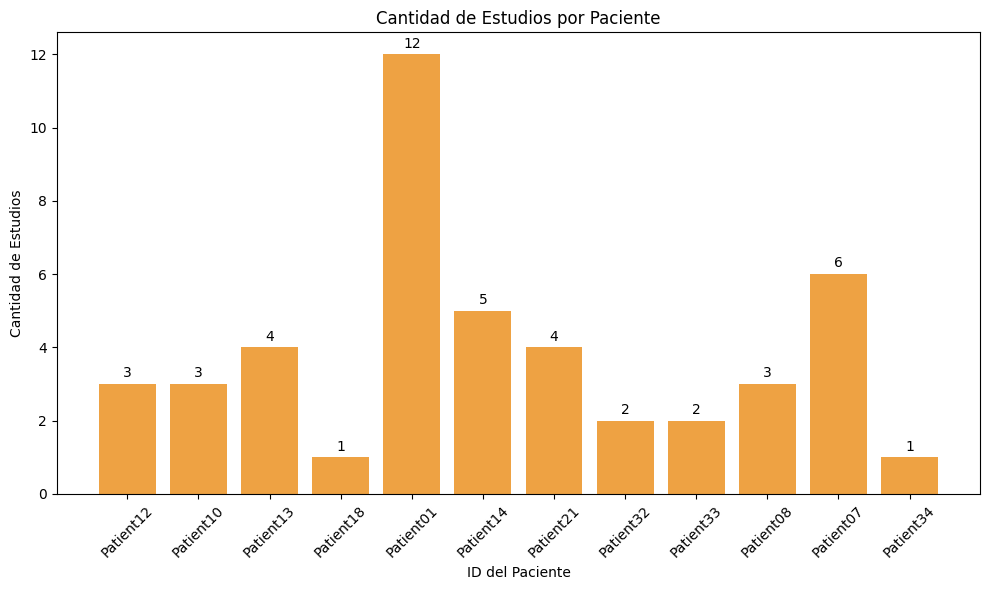

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(study_count_uniq.keys(), study_count_uniq.values(), color='#EEA243')
plt.xlabel('ID del Paciente')
plt.ylabel('Cantidad de Estudios')
plt.title('Cantidad de Estudios por Paciente')
plt.xticks(rotation=45)

for id, count2 in study_count_uniq.items():
    plt.text(id, count2 + 0.1, str(count2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis Descriptivo

In [5]:
def analyze_univariate_time_series(signals):
    for signal_name, values in signals.items():
        data = pd.Series(values)

        # Calculamos estadísticas descriptivas
        stats = data.describe()
        stats_table = pd.DataFrame(stats).transpose()
        print(f"Estadísticas Descriptivas para {signal_name}:\n{stats_table.transpose()}\n")

        # Generamos histograma en una figura separada
        plt.figure(figsize=(6, 4))
        sns.histplot(data, kde=True, color='skyblue')
        plt.title(f'Histograma de {signal_name}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.show()

        # Generamos boxplot en una figura separada
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=data, color='lightgreen')
        plt.title(f'Boxplot de {signal_name}')
        plt.xlabel('Valor')
        plt.show()

def analyze_multivariate_time_series(signals):
    data = pd.DataFrame(signals)

    # Calculamos la matriz de correlación
    correlation_matrix = data.corr()
    print("Matriz de Correlación:\n", correlation_matrix)

    # Visualización de la matriz de correlación usando un esquema de un solo color
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

Estadísticas Descriptivas para ABP:
                  0
count  70670.000000
mean      75.793407
std       19.486869
min      -19.190947
25%       61.462615
50%       72.114736
75%       81.203429
max      157.681910



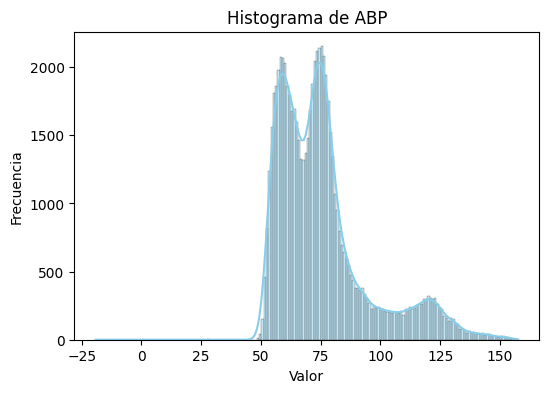

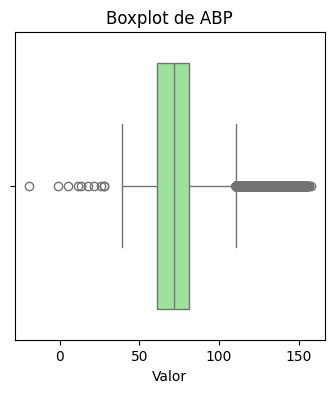

Estadísticas Descriptivas para ICP:
                  0
count  70670.000000
mean       7.536645
std        0.880690
min       -1.748945
25%        6.916858
50%        7.538510
75%        8.153457
max       10.555833



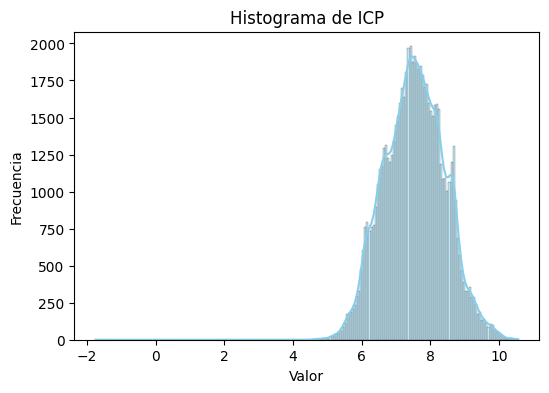

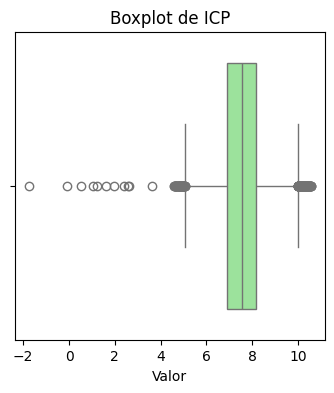

Estadísticas Descriptivas para CBFV:
                  0
count  70670.000000
mean     102.831970
std       30.115619
min      -57.902916
25%       80.044330
50%       98.585702
75%      119.165085
max      213.366710



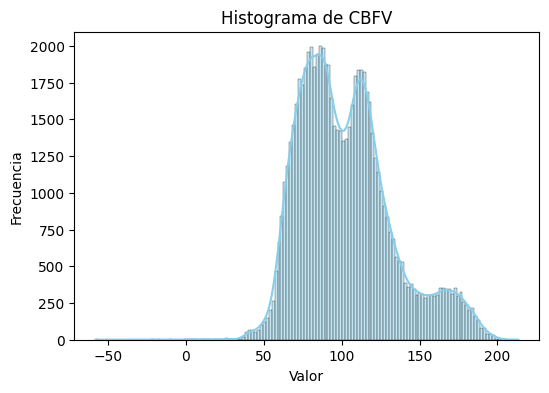

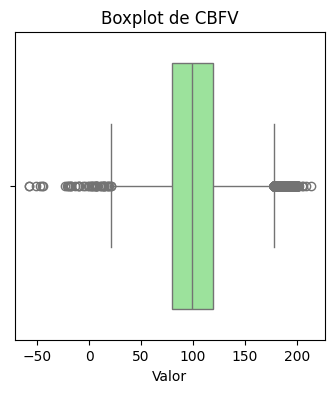

Matriz de Correlación:
            ABP       ICP      CBFV
ABP   1.000000  0.640500 -0.160612
ICP   0.640500  1.000000 -0.033759
CBFV -0.160612 -0.033759  1.000000


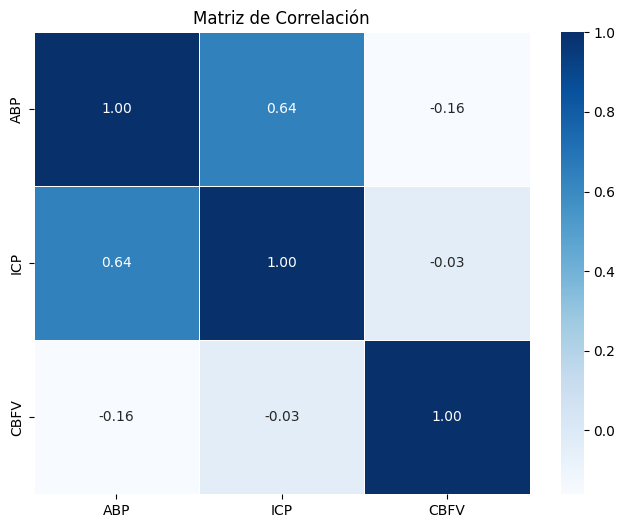

In [6]:
analyze_univariate_time_series(filt_dict)
analyze_multivariate_time_series(filt_dict)